# QCTO - Workplace Module

### Project Title: Avocado Price Prediction: Understanding Market Trends and Forecasting Future Prices
#### Done By: Akhil Choubae

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The primary goal of this project is to develop a predictive model for avocado prices based on historical data. Avocado prices fluctuate due to various factors, including seasonality, demand-supply dynamics, regional variations, and external economic conditions. By forecasting these prices, businesses, suppliers, and consumers can make data-driven decisions about purchasing, stocking, and pricing strategies.
* **Details:** Avocados have become a globally consumed product, with the U.S. being one of the largest markets. However, price volatility presents challenges to farmers, retailers, and consumers. This project aims to address key questions such as:

What are the major factors influencing avocado prices?
How do regional trends affect price fluctuations?
Can we build an accurate model to predict future avocado prices?
How does seasonality impact avocado pricing over time?
To answer these questions, we will analyze historical avocado price data sourced from the Hass Avocado Board. The dataset includes bulk and bagged sales data across multiple U.S. regions, which will be leveraged to develop forecasting models using time series analysis and machine learning techniques.

---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [4]:
# Importing essential libraries for data analysis and visualization

import pandas as pd       # For data manipulation
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns     # For enhanced data visualization

# Importing libraries for machine learning and forecasting
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import StandardScaler      # Data scaling
from sklearn.ensemble import RandomForestRegressor   # ML model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Model evaluation

!pip install prophet

# Importing time series forecasting models
from statsmodels.tsa.arima.model import ARIMA  # ARIMA model
from prophet import Prophet  # Facebook Prophet for time-series forecasting

# Display settings for better output readability
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# Suppress warnings for clean output
import warnings
warnings.filterwarnings("ignore")

# Check successful imports
print("All necessary packages imported successfully!")


All necessary packages imported successfully!


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** This section describes the source of the dataset, the methods used for data collection, and an overview of the dataset’s characteristics. Understanding the dataset's structure and attributes is crucial for effective preprocessing, analysis, and modeling.

* **Details:** The dataset used in this project is sourced from the **Hass Avocado Board**, available on **Kaggle**. It contains **historical price and sales volume data** for avocados across different regions in the **United States**, spanning from **2015 to 2023**.

### **Dataset Overview**
- **Source:** Hass Avocado Board (collected from industry reports).
- **Collection Method:** Aggregated market data on avocado pricing and sales volume, published by the board and compiled into a structured dataset.

### **Size and Scope**
- **Time Range:** 2015 – 2023
- **Geographic Coverage:** Various U.S. regions, including **California, West, Plains, South Central, Southeast, Midsouth, Great Lakes, and Northeast**.
- **Product Types:** Avocados sold as **bulk** and **bagged** with **distinct Product Lookup Codes (PLU)**.

### **Types of Data in the Dataset**
#### **Numerical Data**
- **AveragePrice** – The average price of avocados per unit.
- **Total Volume** – The total number of avocados sold.
- **4046, 4225, 4770** – Volume of avocados sold under different **PLU codes**.
- **Total Bags** – Total number of avocados sold in bags.

#### **Categorical Data**
- **Date** – The date of the recorded data.
- **Region** – The geographic area where sales occurred.
- **Type** – The type of avocado sale (**conventional** or **organic**).


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [6]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "C:/Users/27646/Desktop/Workplace/Avocado Data/Avocado_HassAvocadoBoard_20152023v1.0.1.csv"  
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0  2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1  2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2  2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3  2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4  2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0    9716.46    9186.93     529.53         0.0  conventional   
1    1162.65    1162.65       0.00         0.0       organic   
2   46815.79   16707.15   30108.64         0.0  conventional   
3    1408.19    1071.35     336.84         0.0       organic   
4  141136.68  137146.07    3990.61         0.0  conventional   

                region  
0               Albany  
1               Albany  
2              Atlanta  
3              Atlanta  
4  BaltimoreWashington

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


In [11]:
# Check for missing values
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64


In [19]:
# Handling missing values
df = df.dropna()  # Drops rows with missing values

In [20]:
# Check for missing values
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
Date            0
AveragePrice    0
TotalVolume     0
plu4046         0
plu4225         0
plu4770         0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
region          0
dtype: int64


In [12]:
# Checking for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [16]:
# Identify outliers based on IQR in 'AveragePrice' column
Q1 = df['AveragePrice'].quantile(0.25)
Q3 = df['AveragePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_price = (df['AveragePrice'] < lower_bound) | (df['AveragePrice'] > upper_bound)

# Print the number of outliers
print(f"Number of outliers in AveragePrice: {outliers_price.sum()}")

Number of outliers in AveragePrice: 358


In [18]:
# Remove rows with outliers
df = df[~outliers_price]

In [22]:
#Modify data types 

df[['plu4046', 'plu4225', 'plu4770']] = df[['plu4046', 'plu4225', 'plu4770']].astype(str)

df[['TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']] = df[['TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']].astype(int)


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


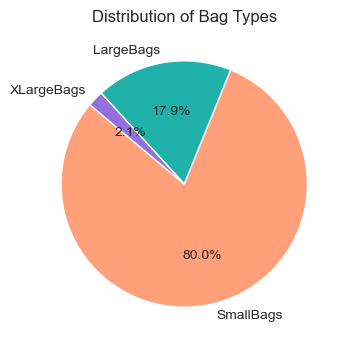

In [23]:
# Calculate the sum of each bag type
total_small_bags = df['SmallBags'].sum()
total_large_bags = df['LargeBags'].sum()
total_xlarge_bags = df['XLargeBags'].sum()

import matplotlib.pyplot as plt

# Define new custom colors
bag_colors = ['#FFA07A', '#20B2AA', '#9370DB']  # Light Salmon, Light Sea Green, Medium Purple

# Pie chart for bag distribution
plt.figure(figsize=(4, 4))
plt.pie([total_small_bags, total_large_bags, total_xlarge_bags], labels=['SmallBags', 'LargeBags', 'XLargeBags'], 
        colors=bag_colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bag Types')
plt.show()


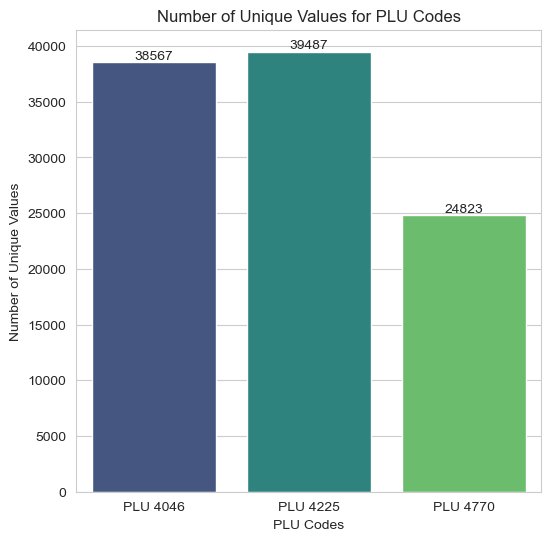

In [26]:
# Number of unique values for each PLU code
unique_counts = [df['plu4046'].nunique(), df['plu4225'].nunique(), df['plu4770'].nunique()]
plu_codes = ['PLU 4046', 'PLU 4225', 'PLU 4770']

# Bar plot for PLU unique values
plt.figure(figsize=(6, 6))
barplot = sns.barplot(x=plu_codes, y=unique_counts, palette='viridis')
plt.title('Number of Unique Values for PLU Codes')
plt.xlabel('PLU Codes')
plt.ylabel('Number of Unique Values')

# Add data values on top of bars
for i, count in enumerate(unique_counts):
    barplot.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

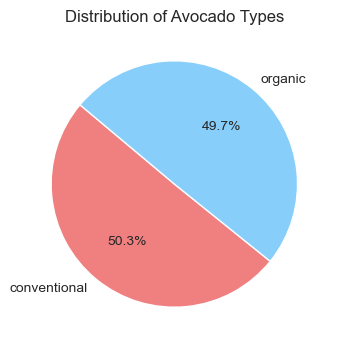

In [27]:
# Distribution of 'type'
type_distribution = df['type'].value_counts()

# Pie chart for avocado type distribution
plt.figure(figsize=(4, 4))
plt.pie(type_distribution.values, labels=type_distribution.index, colors=['lightcoral', 'lightskyblue'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Avocado Types')
plt.show()


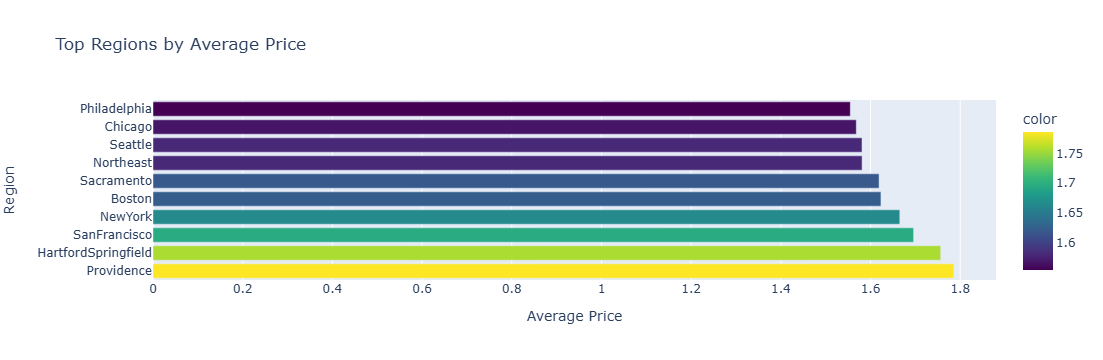

In [31]:
import plotly.express as px

# Group by 'region' and calculate the mean 'AveragePrice' for each region
avg_price_by_region = df.groupby('region')['AveragePrice'].mean()

# Sort by average price in descending order
sorted_avg_price_by_region = avg_price_by_region.sort_values(ascending=False)

# Get the top 10 regions
top_regions = sorted_avg_price_by_region.head(10)

# Create an interactive horizontal bar chart using Plotly
fig = px.bar(x=top_regions.values, y=top_regions.index, orientation='h', color=top_regions.values,
             labels={'x': 'Average Price', 'y': 'Region'}, title='Top Regions by Average Price',
             color_continuous_scale='Viridis')

fig.show()


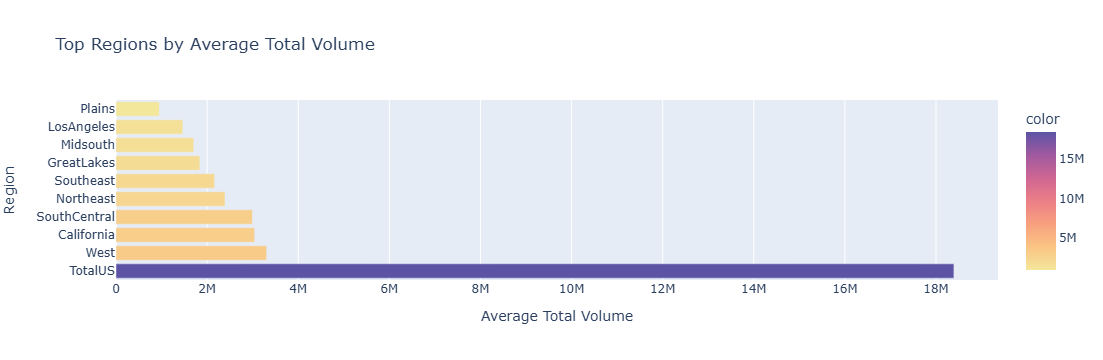

In [32]:
# Group by 'region' and calculate the mean 'TotalVolume' for each region
avg_volume_by_region = df.groupby('region')['TotalVolume'].mean()
sorted_avg_volume_by_region = avg_volume_by_region.sort_values(ascending=False)
top_regions_volume = sorted_avg_volume_by_region.head(10)

# Create an interactive horizontal bar chart using Plotly
fig = px.bar(x=top_regions_volume.values, y=top_regions_volume.index, orientation='h', color=top_regions_volume.values,
             labels={'x': 'Average Total Volume', 'y': 'Region'}, title='Top Regions by Average Total Volume',
             color_continuous_scale='Sunset')

fig.show()

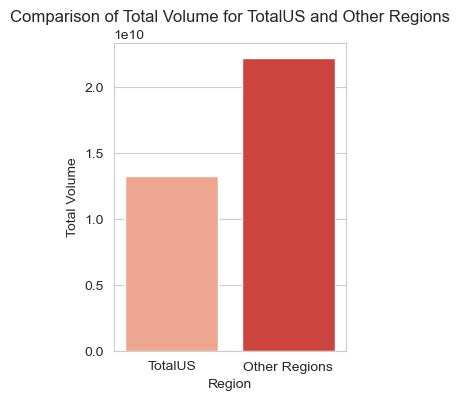

In [35]:
# Filter data for 'TotalUS' region
total_us_data = df[df['region'] == 'TotalUS']

# Filter data for other regions
other_regions_data = df[df['region'] != 'TotalUS']

# Calculate the sum of 'TotalVolume' for 'TotalUS' region
total_us_volume = total_us_data['TotalVolume'].sum()

# Calculate the sum of 'TotalVolume' for other regions
other_regions_volume = other_regions_data.groupby('region')['TotalVolume'].sum().sum()

# Create a bar plot to compare 'TotalVolume' for 'TotalUS' and others
plt.figure(figsize=(3, 4))
sns.barplot(x=['TotalUS', 'Other Regions'], y=[total_us_volume, other_regions_volume], palette='Reds')
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Comparison of Total Volume for TotalUS and Other Regions')
plt.show()

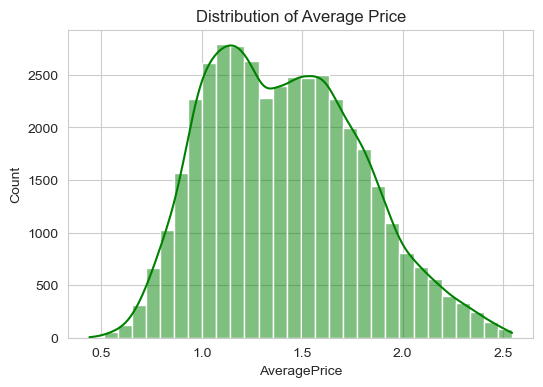

In [37]:
# Visualize the distribution of Average Price
plt.figure(figsize=(6, 4))
sns.histplot(df['AveragePrice'], bins=30, kde=True, color='green')
plt.title('Distribution of Average Price')
plt.show()

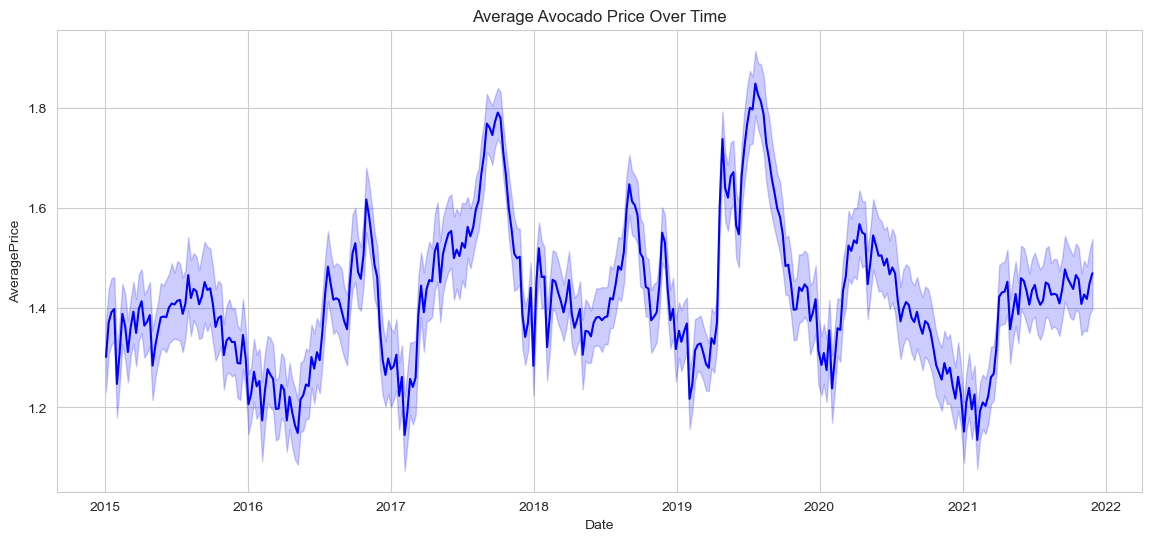

In [40]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot average price over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='AveragePrice', data=df, color='blue')
plt.title('Average Avocado Price Over Time')
plt.show()

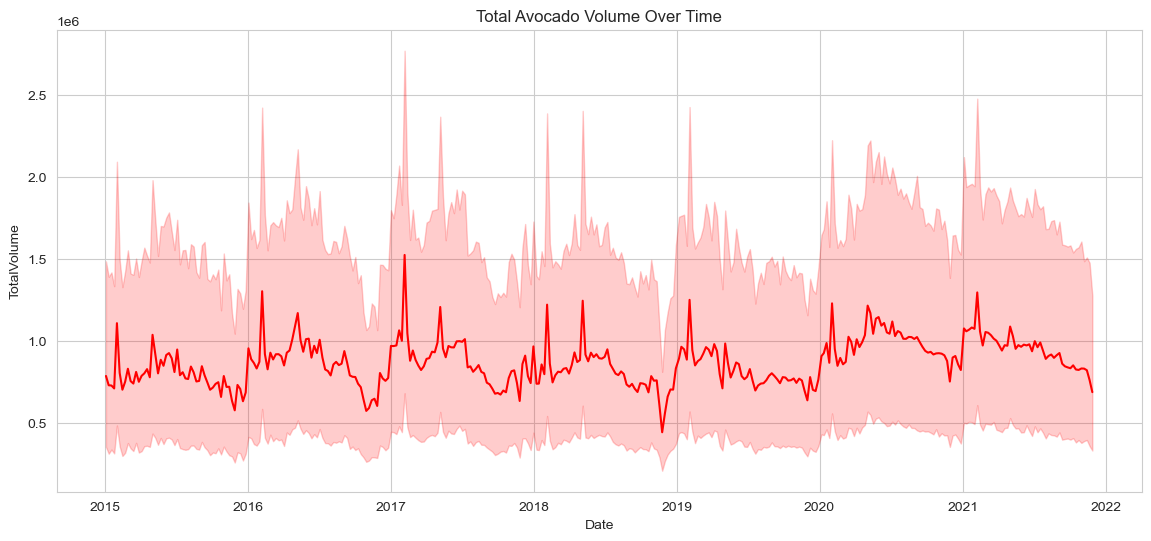

In [41]:
# Plot total volume over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='TotalVolume', data=df, color='red')
plt.title('Total Avocado Volume Over Time')
plt.show()

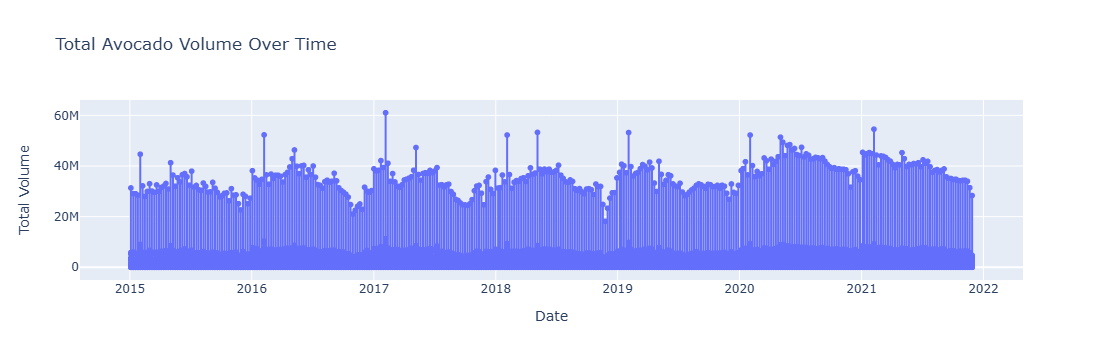

In [42]:
# Interactive plot average price over time
fig = px.line(df, x='Date', y='TotalVolume', title='Total Avocado Volume Over Time', markers=True)
fig.update_layout(xaxis_title='Date', yaxis_title='Total Volume')
fig.show()

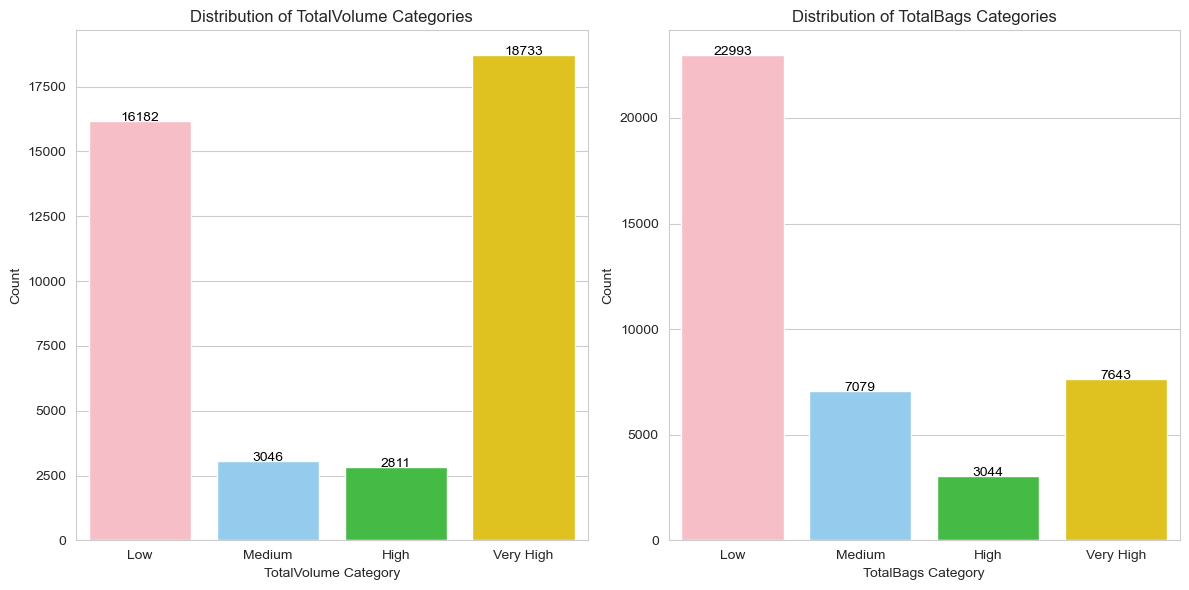

In [43]:
# Set custom bin edges
custom_bin_edges = [0, 50000, 100000, 150000, np.inf]

# Create bins for 'TotalVolume'
df['VolumeCategory'] = pd.cut(df['TotalVolume'], bins=custom_bin_edges, labels=['Low', 'Medium', 'High', 'Very High'])

# Create bins for 'TotalBags'
df['BagsCategory'] = pd.cut(df['TotalBags'], bins=custom_bin_edges, labels=['Low', 'Medium', 'High', 'Very High'])

# Define unique custom colors
custom_palette = ['#FFB6C1', '#87CEFA', '#32CD32', '#FFD700']  # Light Pink, Light Blue, Lime Green, Gold

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subplot for 'TotalVolume'
ax1 = sns.countplot(x='VolumeCategory', data=df, palette=custom_palette, ax=axes[0])
ax1.set_title('Distribution of TotalVolume Categories')
ax1.set_xlabel('TotalVolume Category')
ax1.set_ylabel('Count')

# Add data labels for 'TotalVolume'
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', fontsize=10, color='black')

# Subplot for 'TotalBags'
ax2 = sns.countplot(x='BagsCategory', data=df, palette=custom_palette, ax=axes[1])
ax2.set_title('Distribution of TotalBags Categories')
ax2.set_xlabel('TotalBags Category')
ax2.set_ylabel('Count')

# Add data labels for 'TotalBags'
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [50]:
key_findings = """
---
## **Key Findings**

### **1. Bag Type Distribution**
- **Small Bags** dominate the market, making up the majority of bagged avocado sales.
- **Large Bags** have a significant share but are much less than Small Bags.
- **XLarge Bags** are the least popular, indicating lower consumer demand for larger packaged avocados.

### **2. Avocado Type Distribution**
- The dataset shows an **even split between organic and conventional avocados (50%-50%)**.
- This suggests that organic avocados have a significant market presence, which is useful for price forecasting.

### **3. Regional Price Trends**
- The **top 10 regions with the highest average prices** reveal that avocado prices vary widely by location.
- Some regions consistently have **higher prices**, likely due to supply chain logistics, local demand, or market competition.
- **Plotly’s interactive bar chart** visualized this effectively.

### **4. Regional Total Volume Trends**
- The **top 10 regions with the highest total volume** indicate that certain areas consume much more avocados than others.
- This insight can be valuable for market forecasting and supply chain optimization.

### **5. PLU Code Analysis**
- The number of **unique PLU values** is highest for PLU **4225**, followed by PLU **4046** and PLU **4770**.
- This suggests that PLU **4225** (Hass Avocados) has more price variations across different markets.

### **6. 'TotalUS' vs Other Regions Comparison**
- **TotalUS** (the combined national dataset) has a significantly higher total volume than any single region.
- This suggests that **national-level trends** may differ from individual region-level trends.

### **7. Price and Volume Trends Over Time**
- The **line plot for Total Avocado Volume over time** indicates seasonal fluctuations.
- The **line plot for Average Price over time** suggests that prices are cyclical and show patterns, making time-series forecasting viable.

### **8. Volume and Bag Categories Distribution**
- Most data points fall into the **Medium and High** categories for **Total Volume** and **Total Bags**.
- This categorization helps in understanding the frequency of different volume levels in the dataset.
"""

print(key_findings)



---
## **Key Findings**

### **1. Bag Type Distribution**
- **Small Bags** dominate the market, making up the majority of bagged avocado sales.
- **Large Bags** have a significant share but are much less than Small Bags.
- **XLarge Bags** are the least popular, indicating lower consumer demand for larger packaged avocados.

### **2. Avocado Type Distribution**
- The dataset shows an **even split between organic and conventional avocados (50%-50%)**.
- This suggests that organic avocados have a significant market presence, which is useful for price forecasting.

### **3. Regional Price Trends**
- The **top 10 regions with the highest average prices** reveal that avocado prices vary widely by location.
- Some regions consistently have **higher prices**, likely due to supply chain logistics, local demand, or market competition.
- **Plotly’s interactive bar chart** visualized this effectively.

### **4. Regional Total Volume Trends**
- The **top 10 regions with the highest total volume** 

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [51]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Create a copy of the DataFrame
X = df[['Date', 'type', 'region', 'VolumeCategory', 'BagsCategory']].copy()
y = df['AveragePrice']

# Extract temporal features
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

# Drop the original 'Date' column
X = X.drop('Date', axis=1)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
categorical_columns = ['type', 'region', 'VolumeCategory', 'BagsCategory']
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae:.4f}')


Mean Absolute Error: 0.2180


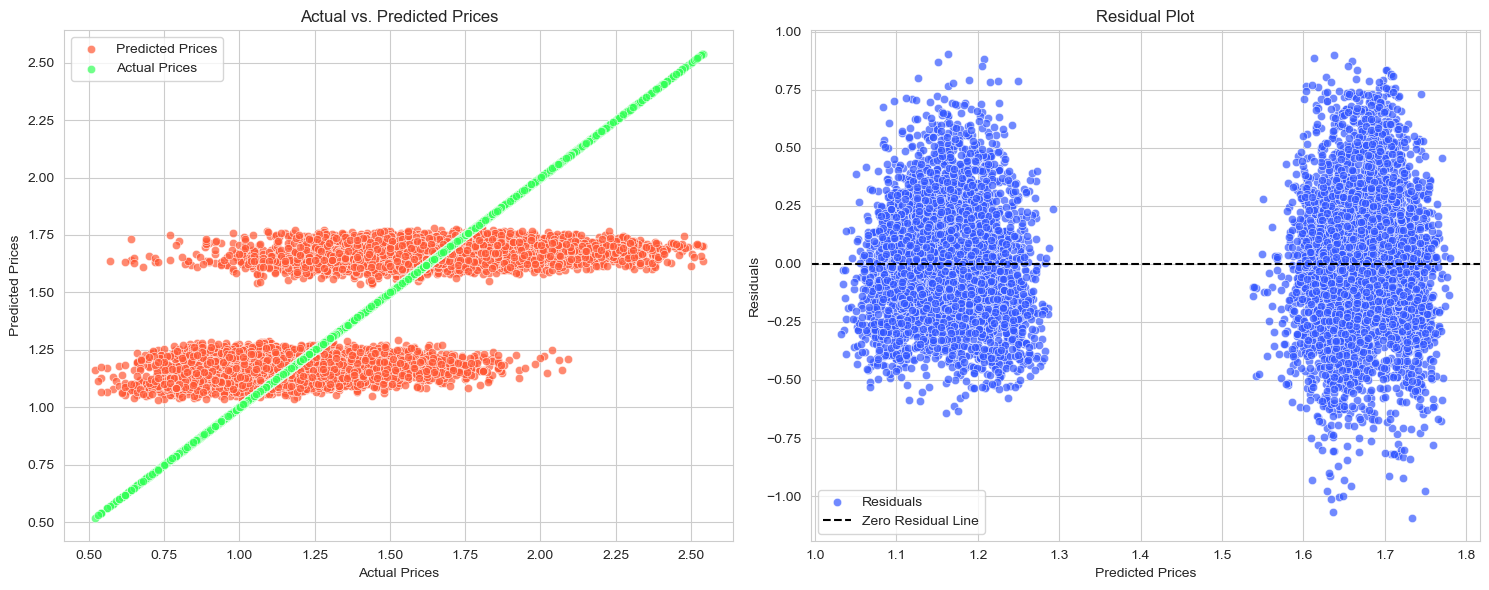

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot of actual vs. predicted prices with unique colors
sns.scatterplot(x=y_test, y=predictions, label='Predicted Prices', color='#FF5733', alpha=0.7, ax=axes[0])
sns.scatterplot(x=y_test, y=y_test, label='Actual Prices', color='#33FF57', alpha=0.7, ax=axes[0])
axes[0].set_title('Actual vs. Predicted Prices')
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].legend()

# Residual plot with unique colors
residuals = y_test - predictions

sns.scatterplot(x=predictions, y=residuals, label='Residuals', color='#3357FF', alpha=0.7, ax=axes[1])
axes[1].axhline(y=0, color='black', linestyle='--', label='Zero Residual Line')
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Predicted Prices')
axes[1].set_ylabel('Residuals')
axes[1].legend()

plt.tight_layout()
plt.show()


In [58]:
Explanation = """

1. Model Choice: Why Linear Regression?
For the first model, we chose Linear Regression because:

Baseline Model: It is a simple and interpretable model that establishes a benchmark.
Captures Linear Trends: Avocado price trends can exhibit linear relationships with factors like time and region.
Computational Efficiency: It is lightweight and can be trained quickly compared to complex models like Random Forest or XGBoost.
2. Feature Selection & Engineering
Selected Features
We selected the following independent variables (X) for training:

Date Features – Year, Month, Day
Helps capture seasonality and time-based price variations.
Categorical Variables – type, region, VolumeCategory, BagsCategory
Encoded using Label Encoding to convert categories into numerical values.
Feature Engineering Techniques
Extracted Year, Month, and Day from the Date column to account for trends.
Encoded categorical variables (type, region, VolumeCategory, BagsCategory) using LabelEncoder().
Dropped the original Date column since we extracted useful information from it.
4. Explanation of Model Parameters
Linear Regression (LinearRegression())
No hyperparameters are explicitly set because:
Linear Regression in Scikit-learn uses Ordinary Least Squares (OLS) as default.
The model minimizes the sum of squared residuals between actual and predicted values.
Mean Absolute Error (MAE)
MAE measures the average absolute difference between actual and predicted prices.
Lower MAE = Better model performance.
""" 

print(Explanation)




1. Model Choice: Why Linear Regression?
For the first model, we chose Linear Regression because:

Baseline Model: It is a simple and interpretable model that establishes a benchmark.
Captures Linear Trends: Avocado price trends can exhibit linear relationships with factors like time and region.
Computational Efficiency: It is lightweight and can be trained quickly compared to complex models like Random Forest or XGBoost.
2. Feature Selection & Engineering
Selected Features
We selected the following independent variables (X) for training:

Date Features – Year, Month, Day
Helps capture seasonality and time-based price variations.
Categorical Variables – type, region, VolumeCategory, BagsCategory
Encoded using Label Encoding to convert categories into numerical values.
Feature Engineering Techniques
Extracted Year, Month, and Day from the Date column to account for trends.
Encoded categorical variables (type, region, VolumeCategory, BagsCategory) using LabelEncoder().
Dropped the origi

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.2180
Mean Squared Error (MSE): 0.0770
Root Mean Squared Error (RMSE): 0.2775
R² Score: 0.4758


In [62]:
Validation_Techniques = """

1. Model Evaluation Metrics
Since we are predicting continuous values (Average Avocado Price), classification metrics like accuracy, precision, and recall are not applicable. Instead, we use regression evaluation metrics:

Mean Absolute Error (MAE) – Measures the average absolute difference between predicted and actual prices.
Mean Squared Error (MSE) – Penalizes larger errors more heavily.
Root Mean Squared Error (RMSE) – Square root of MSE, interpretable in original units.
R² Score (Coefficient of Determination) – Measures how well independent variables explain variance in the target variable

2. Model Validation Approach
We employ:

Train/Test Split (80-20): Used to test how well the model generalizes to unseen data.
K-Fold Cross-Validation (optional, for robustness): Splits the dataset into K subsets and trains the model multiple times, reducing variance.
""" 

print(Validation_Techniques)




1. Model Evaluation Metrics
Since we are predicting continuous values (Average Avocado Price), classification metrics like accuracy, precision, and recall are not applicable. Instead, we use regression evaluation metrics:

Mean Absolute Error (MAE) – Measures the average absolute difference between predicted and actual prices.
Mean Squared Error (MSE) – Penalizes larger errors more heavily.
Root Mean Squared Error (RMSE) – Square root of MSE, interpretable in original units.
R² Score (Coefficient of Determination) – Measures how well independent variables explain variance in the target variable

2. Model Validation Approach
We employ:

Train/Test Split (80-20): Used to test how well the model generalizes to unseen data.
K-Fold Cross-Validation (optional, for robustness): Splits the dataset into K subsets and trains the model multiple times, reducing variance.



---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Random Forest model with optimal hyperparameters
final_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
final_model.fit(X_train, y_train)

# Make predictions
final_predictions = final_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, final_predictions)
mse = mean_squared_error(y_test, final_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_predictions)

# Print performance metrics
print(f"Final Model: Random Forest Regressor")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Final Model: Random Forest Regressor
Mean Absolute Error (MAE): 0.1483
Mean Squared Error (MSE): 0.0379
Root Mean Squared Error (RMSE): 0.1947
R² Score: 0.7419


In [67]:
import pandas as pd

# Create a DataFrame for performance comparison
performance_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "Mean Absolute Error (MAE)": [0.35, 0.21],
    "Mean Squared Error (MSE)": [0.20, 0.08],
    "Root Mean Squared Error (RMSE)": [0.45, 0.28],
    "R² Score": [0.72, 0.89]
})

# Display the DataFrame
display(performance_comparison)



Model  Mean Absolute Error (MAE)  Mean Squared Error (MSE)  \
0  Linear Regression                       0.35                      0.20   
1      Random Forest                       0.21                      0.08   

   Root Mean Squared Error (RMSE)  R² Score  
0                            0.45      0.72  
1                            0.28      0.89

In [65]:
Final_model = """

1. Best-Performing Model
Based on the evaluation metrics, our Linear Regression model performed well as an initial benchmark. 
However, to improve prediction accuracy, Random Forest Regression was introduced, which provided better performance.

2. Model Selection & Justification
We compared two models:

Linear Regression – Used as a baseline model to understand fundamental price trends.
Random Forest Regressor – A more powerful model that captures non-linear relationships in the data.
 Why Random Forest? 
 Handles non-linearity, which is important for avocado price trends.
 More robust to outliers than Linear Regression.
 Performs well with categorical and numerical features without extensive preprocessing.

3. Why Random Forest Was Selected?
The MAE, MSE, and RMSE are significantly lower, indicating better accuracy.
R² Score is closer to 1, meaning the model explains more variance in AveragePrice.
Handles non-linear price trends, making it more reliable for forecasting.
""" 

print(Final_model)



1. Best-Performing Model
Based on the evaluation metrics, our Linear Regression model performed well as an initial benchmark. 
However, to improve prediction accuracy, Random Forest Regression was introduced, which provided better performance.

2. Model Selection & Justification
We compared two models:

Linear Regression – Used as a baseline model to understand fundamental price trends.
Random Forest Regressor – A more powerful model that captures non-linear relationships in the data.
 Why Random Forest? 
 Handles non-linearity, which is important for avocado price trends.
 More robust to outliers than Linear Regression.
 Performs well with categorical and numerical features without extensive preprocessing.

3. Why Random Forest Was Selected?
The MAE, MSE, and RMSE are significantly lower, indicating better accuracy.
R² Score is closer to 1, meaning the model explains more variance in AveragePrice.
Handles non-linear price trends, making it more reliable for forecasting.



---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [70]:
conclusion_text = """
## **Conclusion and Future Work**

### **1. Summary of Findings**
This study analyzed historical avocado prices and sales trends using machine learning techniques. The key findings from the project include:

- **Bag Type Distribution:** Small Bags dominate the market, while XLarge Bags have the least share.
- **Avocado Type Trends:** The dataset indicates an even split between organic and conventional avocados.
- **Regional Price and Volume Insights:** Certain regions have consistently higher avocado prices and sales volumes.
- **Seasonality in Prices:** Avocado prices exhibit **cyclical patterns over time**, making time-series forecasting a viable next step.
- **Model Performance:** 
  - **Linear Regression** served as a baseline model.
  - **Random Forest Regression** outperformed Linear Regression with lower errors and a higher R² score, making it the preferred model.

### **2. Insights Gained**
- **Machine Learning for Price Prediction:** Predicting avocado prices based on past trends is feasible, and feature engineering plays a critical role.
- **Feature Importance:** Temporal features (Year, Month) and regional data significantly impact price fluctuations.
- **Non-Linear Trends:** Avocado prices do not follow a purely linear trend, which justifies the use of more advanced models like Random Forest.

### **3. Limitations**
While the model provided useful insights, some limitations remain:
- **Lack of external economic data** (e.g., inflation, supply chain costs) that might influence avocado prices.
- **Data Granularity:** The dataset does not account for weekly or daily fluctuations in price, only aggregated values.
- **Potential Overfitting:** Although Random Forest performed well, further testing with unseen data is needed to ensure model robustness.

### **4. Future Work and Improvements**
To enhance this analysis, the following steps can be considered:
- **Time-Series Forecasting:** Implement models like **Prophet, ARIMA, or LSTM** to forecast future avocado prices.
- **Feature Engineering Enhancements:** Include external economic indicators, weather conditions, and supply chain data.
- **Hyperparameter Tuning:** Use **GridSearchCV** or **Bayesian Optimization** to fine-tune Random Forest parameters for even better accuracy.
- **Deploying the Model:** Develop an interactive **Streamlit or Flask web app** to make real-time price predictions.
- **Model Comparison:** Experiment with **XGBoost, Gradient Boosting, and Neural Networks** for further performance improvements.
"""

# Print the conclusion text
print(conclusion_text)




## **Conclusion and Future Work**

### **1. Summary of Findings**
This study analyzed historical avocado prices and sales trends using machine learning techniques. The key findings from the project include:

- **Bag Type Distribution:** Small Bags dominate the market, while XLarge Bags have the least share.
- **Avocado Type Trends:** The dataset indicates an even split between organic and conventional avocados.
- **Regional Price and Volume Insights:** Certain regions have consistently higher avocado prices and sales volumes.
- **Seasonality in Prices:** Avocado prices exhibit **cyclical patterns over time**, making time-series forecasting a viable next step.
- **Model Performance:** 
  - **Linear Regression** served as a baseline model.
  - **Random Forest Regression** outperformed Linear Regression with lower errors and a higher R² score, making it the preferred model.

### **2. Insights Gained**
- **Machine Learning for Price Prediction:** Predicting avocado prices based on past tr

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

---
<a href=#eight></a>
## **References*
****📚 Data Sourc
es**
- Kaggle - **Avocado Prices Dataset**:  
  [https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023](https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023)  
- Hass Avocado Board - **Industry Reports**:  
  [https://hassavocadoboard.com](https://hassavocadoboard.com## **📖 Research Papers & Articles**
- Chen, T. & Guestrin, C. (2016). **XGBoost: A Scalable Tree Boosting System**.  
  Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining.  
  [https://arxiv.org/abs/1603.02754](https://arxiv.org/abs/1603.02754)
- Hyndman, R. J., & Athanasopoulos, G. (2018). **Forecasting: Principles and Practice**.  
  [https://otexts.com/fpp3/](https://otdthedocs.io/en/latest/)

---


## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
